In [45]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd 
import sys 

sys.path.append("../../tools")
from plot_tools import plot_uv_map,plot_map_zoom

base_output="/Odyssey/private/t22picar/multivar_drifter/outputs"
xp_name= "unet_uv_drifters_aoml_15m_10y_11d_bathy_no_sst_mae_8th_2010"#"unet_uv_drifters_aoml_15m_10y_11d_bathy_no_sst_mae_8th_2010"  #'unet_uv_drifters_aoml_15m_10y_11d_residu' #'unet_uv_drifters_aoml_15m_10y_11d_bathy_no_sst_mae'

result_filepath = f"../rec/{xp_name}/daily/unet_rec_2019-12-30.nc"
uv = xr.open_dataset(result_filepath)
utot = uv.ugos
vtot = uv.vgos
norm = utot**2+ vtot**2

xp_name='unet_uv_drifters_aoml_15m_10y_11d_bathy_no_sst_mae'
result_filepath = f"../rec/{xp_name}/daily/unet_rec_2019-12-30.nc"
uv_ref = xr.open_dataset(result_filepath,engine='netcdf4').sel(lat=slice(-70,70))
uv_ref = uv_ref.interp(lat=uv.lat,lon=uv.lon,method='linear')
utot = uv_ref.ugos
vtot = uv_ref.vgos
norm_ref = utot**2+ vtot**2

"""
xp_name='neurost_sst_ssh_15m_4th'
result_filepath = f"../rec/{xp_name}/daily/unet_rec_4th_2019-07-20"
uv_ref = xr.open_dataset(result_filepath,engine='netcdf4').sel(lat=slice(-70,70))
uv_ref = uv_ref.interp(lat=uv.lat,lon=uv.lon,method='linear')
utot = uv_ref.ugos
vtot = uv_ref.vgos
norm_ref = utot**2+ vtot**2
"""

'\nxp_name=\'neurost_sst_ssh_15m_4th\'\nresult_filepath = f"../rec/{xp_name}/daily/unet_rec_4th_2019-07-20"\nuv_ref = xr.open_dataset(result_filepath,engine=\'netcdf4\').sel(lat=slice(-70,70))\nuv_ref = uv_ref.interp(lat=uv.lat,lon=uv.lon,method=\'linear\')\nutot = uv_ref.ugos\nvtot = uv_ref.vgos\nnorm_ref = utot**2+ vtot**2\n'

In [41]:
norm_ref

<xarray.DataArray (lat: 1120, lon: 2880)> Size: 13MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 8B 2019-11-30
  * lat      (lat) float32 4kB -69.94 -69.81 -69.69 -69.56 ... 69.69 69.81 69.94
  * lon      (lon) float32 12kB -179.9 -179.8 -179.7 ... 179.7 179.8 179.9

In [42]:
# Gulf Stream 

lat_min= 18
lat_max = 70
lon_max = 40
lon_min = -100

zoom_extent=[lon_min,lon_max,lat_min,lat_max]

zoom_ax = [0, 0, 1, 1]

diff_norm = norm-norm_ref

In [43]:
diff_norm

<xarray.DataArray (lat: 1120, lon: 2880)> Size: 13MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 12kB -179.9 -179.8 -179.7 ... 179.7 179.8 179.9
  * lat      (lat) float32 4kB -69.94 -69.81 -69.69 -69.56 ... 69.69 69.81 69.94
    time     datetime64[ns] 8B 2019-11-30

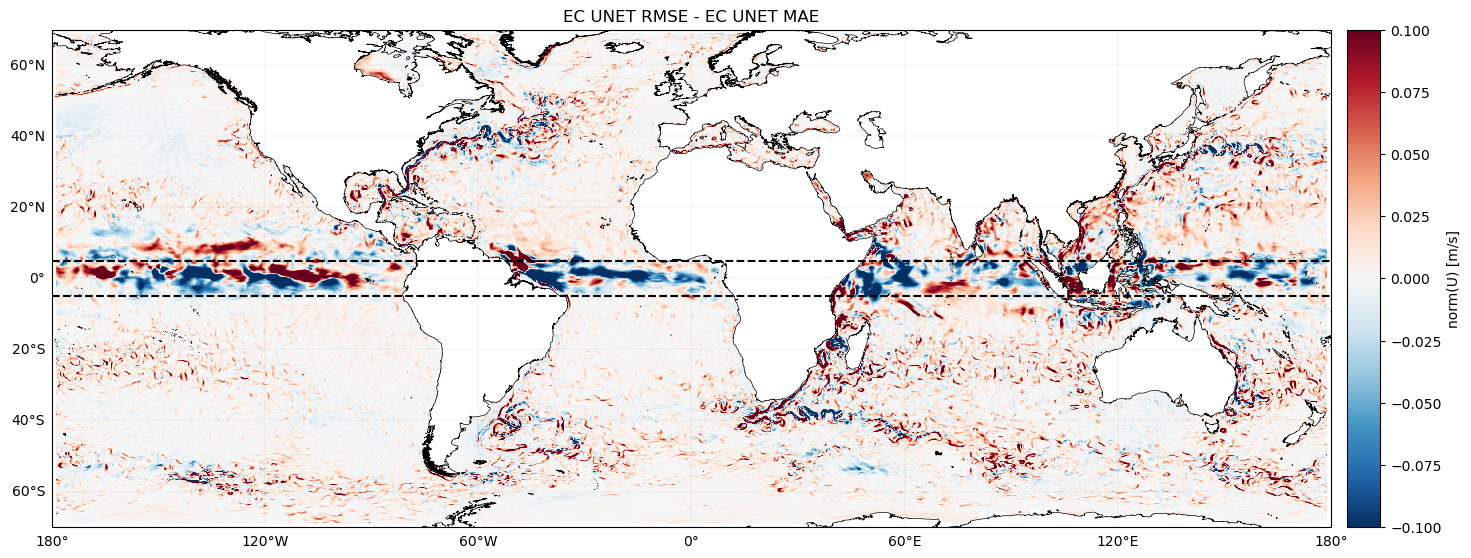

In [44]:
plot_uv_map(diff_norm,utot.lon,utot.lat,vmin=-0.1,vmax=0.1,title='EC UNET RMSE - EC UNET MAE')

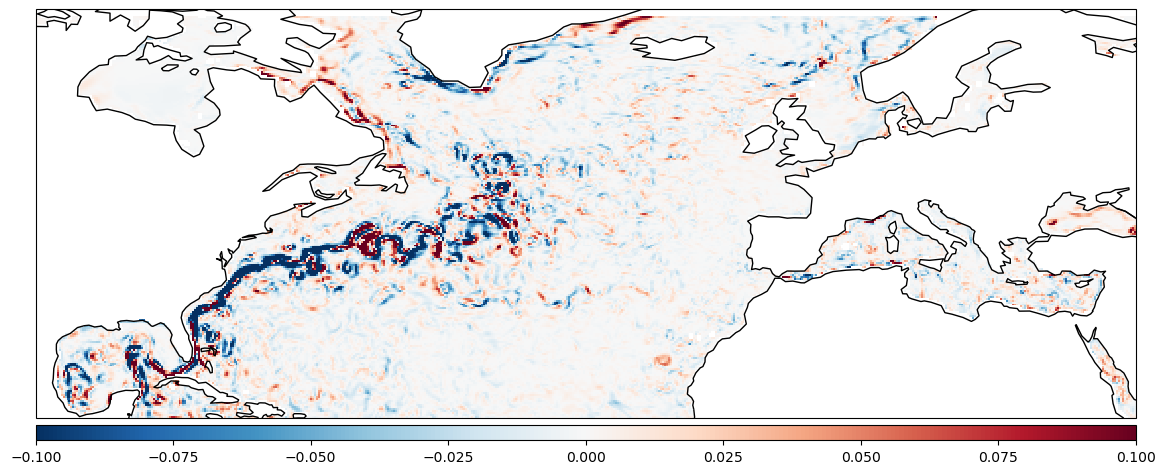

In [29]:
plot_map_zoom(diff_norm,utot.lon,utot.lat,zoom_extent=zoom_extent,zoom_ax=zoom_ax,vmin=-0.1,vmax=0.1)

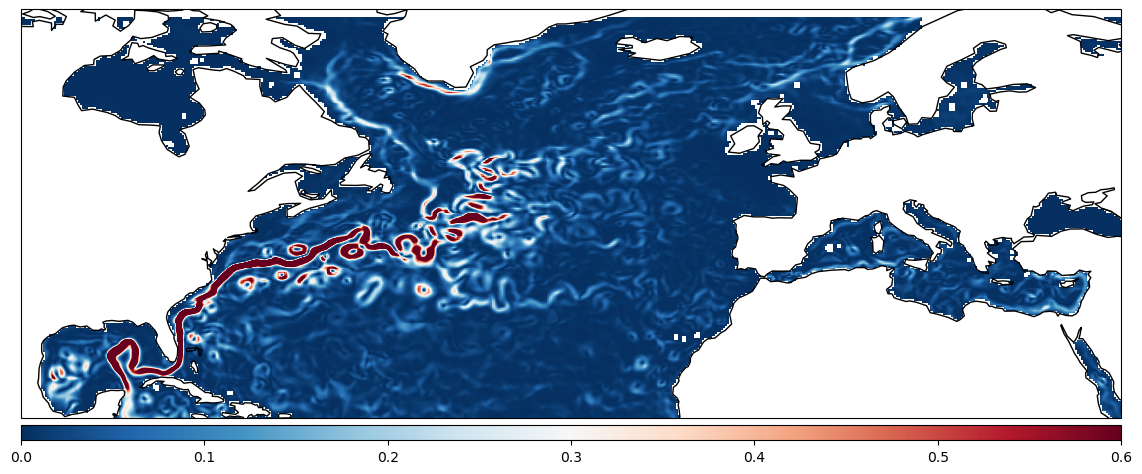

In [5]:
plot_map_zoom(norm_ref,uv.lon,uv.lat,zoom_extent=zoom_extent,zoom_ax=zoom_ax,vmin=0,vmax=0.6)

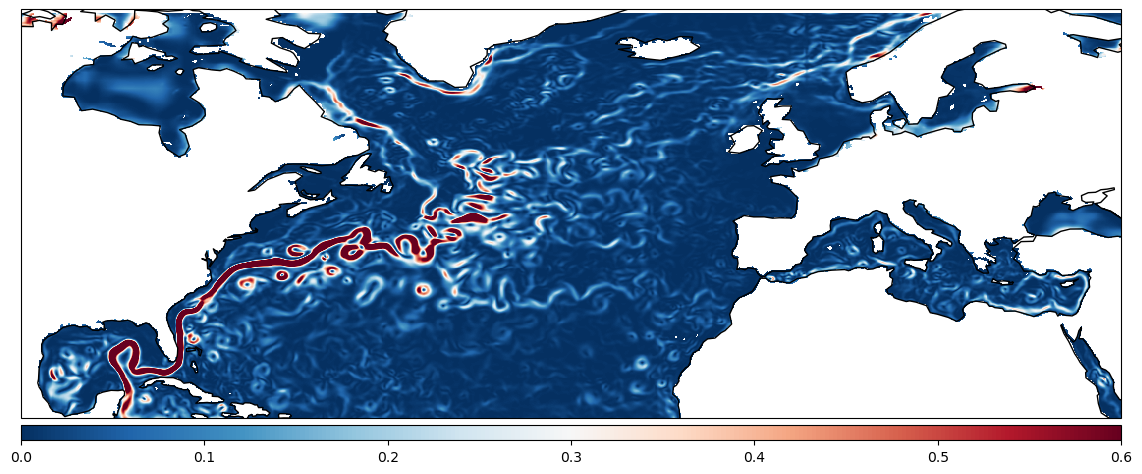

In [6]:
plot_map_zoom(norm,uv.lon,uv.lat,zoom_extent=zoom_extent,zoom_ax=zoom_ax,vmin=0,vmax=0.6)

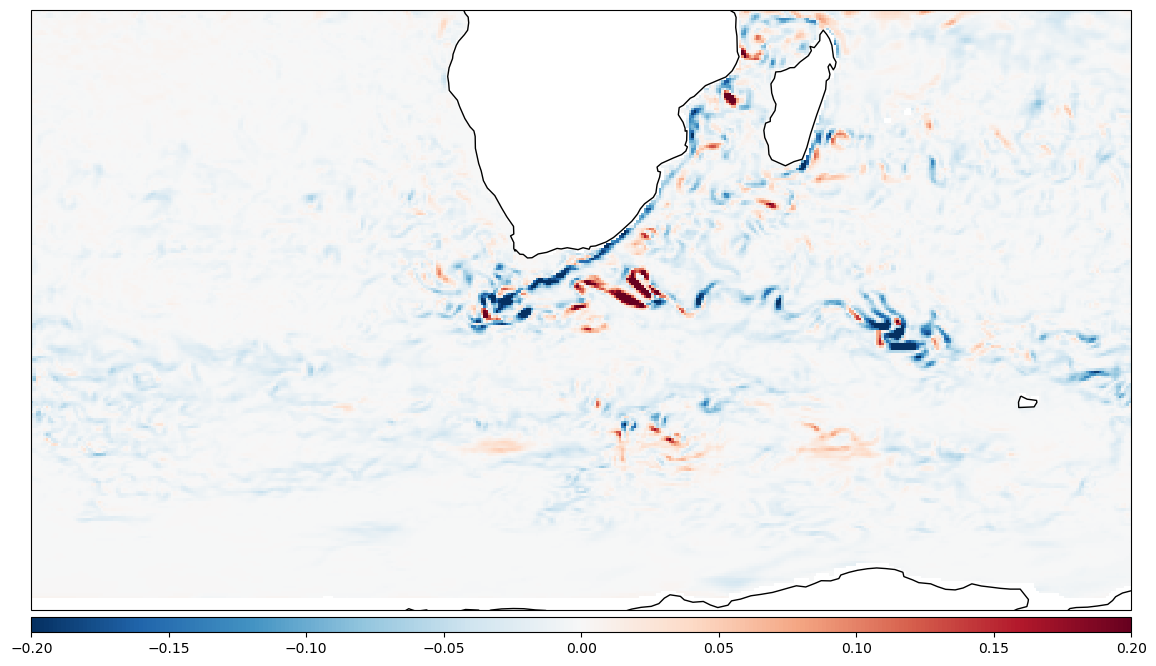

In [15]:
# Agulhas

lat_min= -10
lat_max = -70
lon_max = 80
lon_min = -30

zoom_extent=[lon_min,lon_max,lat_min,lat_max]

#norm = utot.out[index]**2+ vtot.out[index]**2
plot_map_zoom(diff_norm,utot.lon,utot.lat,zoom_extent=zoom_extent,zoom_ax=zoom_ax,vmin=-0.2,vmax=0.2)

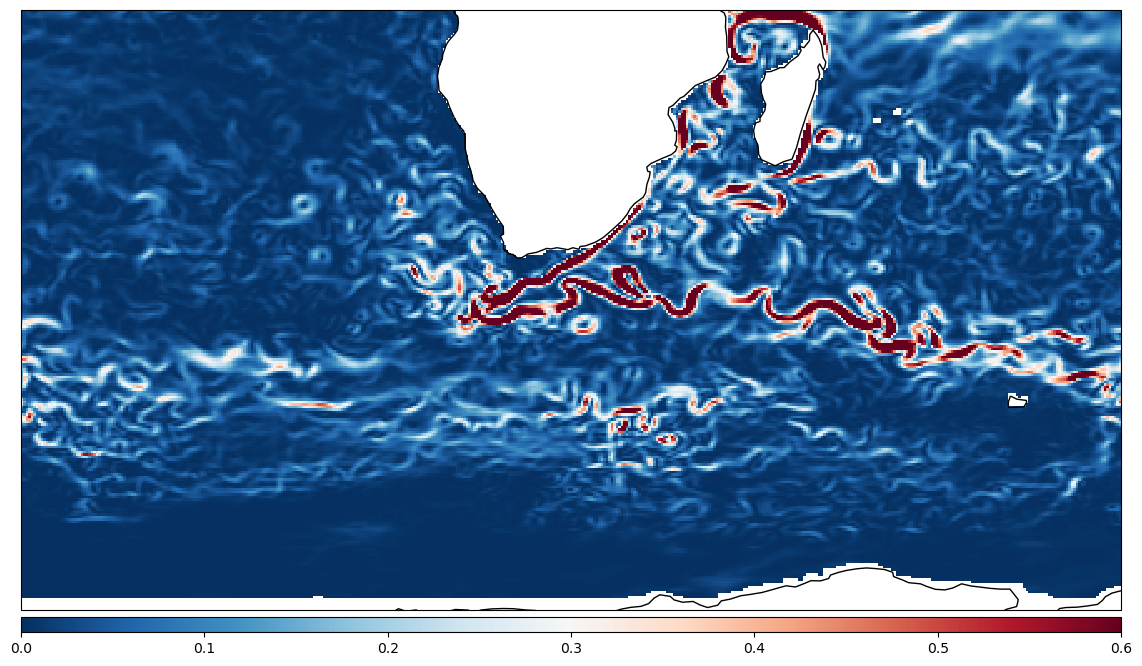

In [16]:
plot_map_zoom(norm_ref,uv.lon,uv.lat,zoom_extent=zoom_extent,zoom_ax=zoom_ax,vmin=0,vmax=0.6)

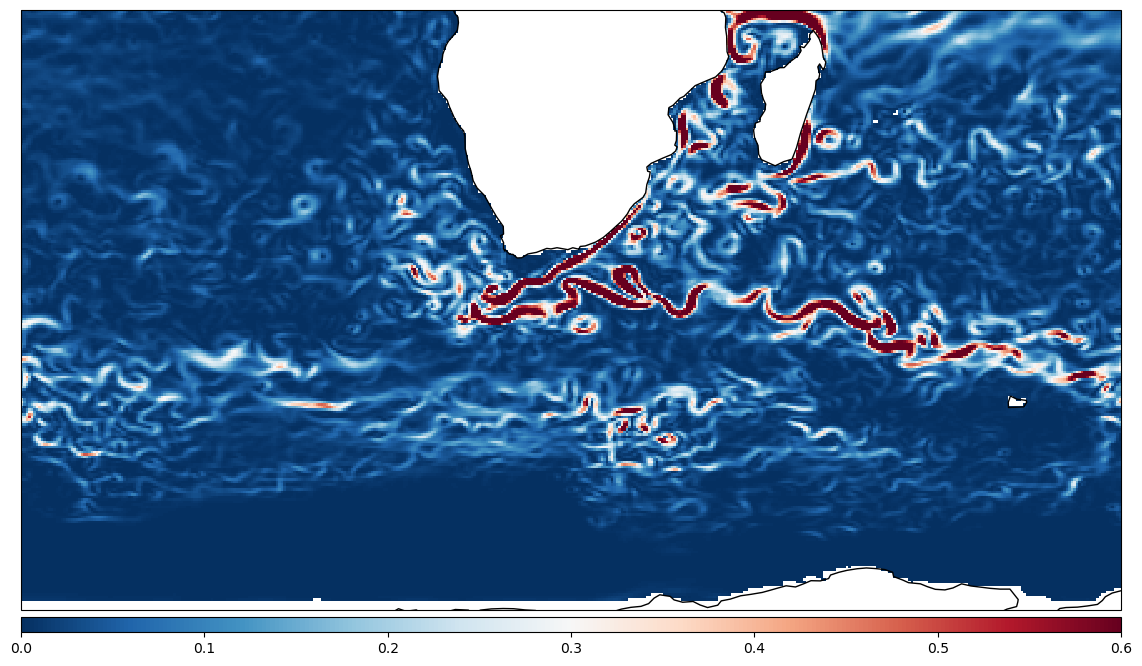

In [17]:
plot_map_zoom(norm,uv.lon,uv.lat,zoom_extent=zoom_extent,zoom_ax=zoom_ax,vmin=0,vmax=0.6)

In [59]:
# Comparison with duacs 

duacs =  "/Odyssey/private/t22picar/data/ssh_L4/SSH_L4_CMEMS_2010-01-01-2024-01-01.nc"
duacs = xr.open_dataset(duacs).sel(time="2019-07-20").sel(longitude=slice(lon_min,lon_max)).sel(latitude=slice(lat_min,lat_max))
norm_duacs = duacs.ugos**2 +  duacs.vgos**2

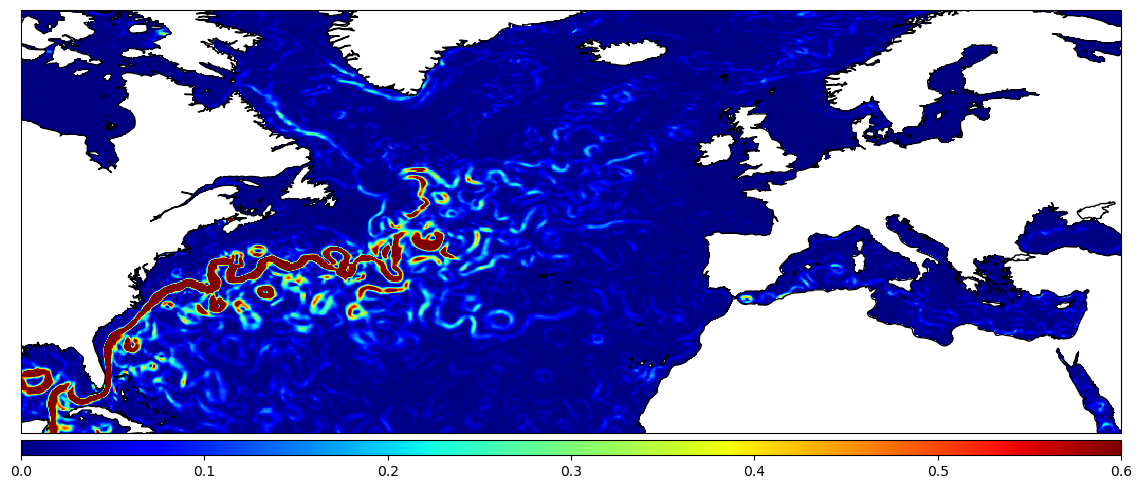

In [60]:
plot_map_zoom(norm_duacs,utot.lon,utot.lat,zoom_extent=zoom_extent,zoom_ax=zoom_ax,title=utot.time.values[0],vmin=0,vmax=0.6,cmap=plt.cm.jet)

In [61]:
diff_norm = norm.values - norm_duacs.values

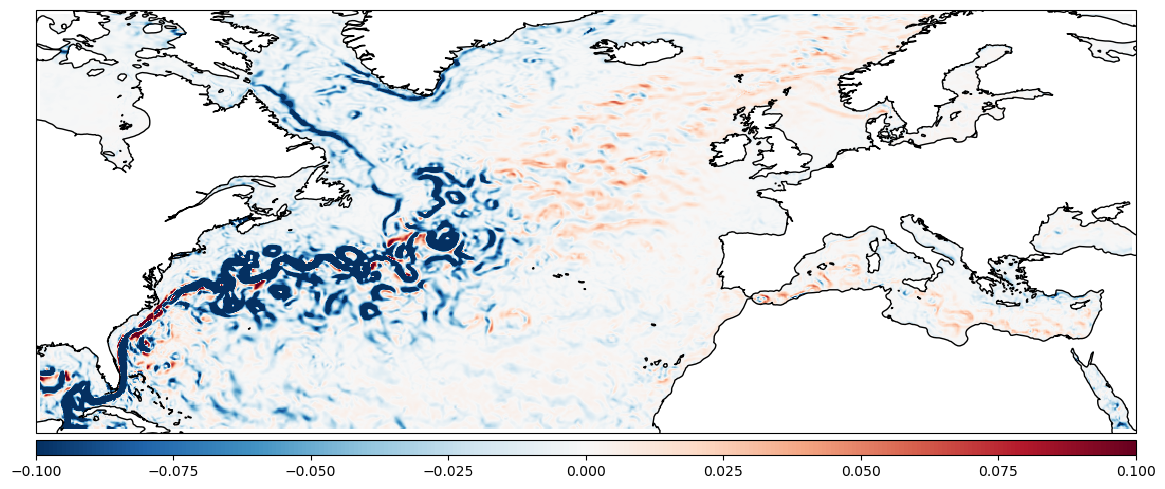

In [62]:
plot_map_zoom(diff_norm,utot.lon,utot.lat,zoom_extent=zoom_extent,zoom_ax=zoom_ax,title=utot.time.values[0],vmin=-0.1,vmax=0.1)